<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1205_SHRISTI/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [ ]:
def add_noise(imgs):
    noise_factor = 0.2
    noisy_imgs = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape)
    return np.clip(noisy_imgs, 0.0, 1.0)


In [ ]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [ ]:
input_img = Input(shape=(32, 32, 3))

In [ ]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0191 - val_loss: 0.0081
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0053 - val_loss: 0.0051


In [ ]:
x_decoded = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


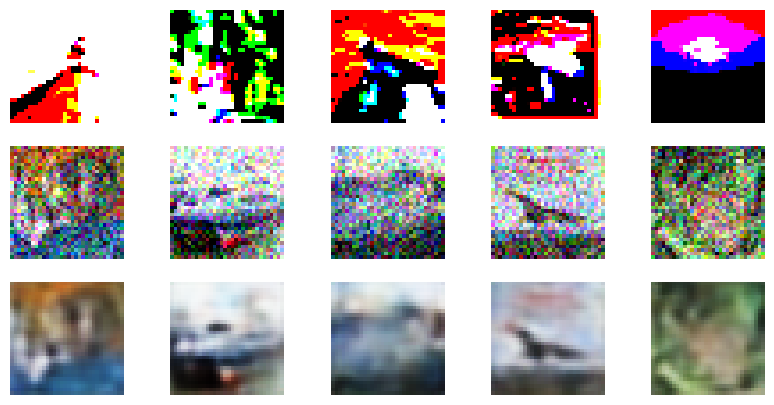

In [ ]:
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.axis('off')

    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_decoded[i])
    plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
import time

# Step 1: Load Dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize images
x_train = preprocess_input(x_train.astype('float32'))
x_test = preprocess_input(x_test.astype('float32'))

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Step 2: Load Pretrained VGG16 Model
base_model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze layers for feature extraction
for layer in base_model_vgg.layers:
    layer.trainable = False

# Add classification layers
vgg_model = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(100, activation="softmax")
])

# Compile the model
vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the VGG16 model
start_time = time.time()
vgg_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
vgg_time = time.time() - start_time

# Evaluate Performance
vgg_loss, vgg_acc = vgg_model.evaluate(x_test, y_test)

print(f"VGG16 Accuracy: {vgg_acc:.4f}, Training Time: {vgg_time:.2f} sec")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.1081 - loss: 9.2876 - val_accuracy: 0.2756 - val_loss: 3.1315
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.2449 - loss: 3.2833 - val_accuracy: 0.3177 - val_loss: 2.7892
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2842 - loss: 2.9663 - val_accuracy: 0.3321 - val_loss: 2.6888
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3107 - loss: 2.7827 - val_accuracy: 0.3470 - val_loss: 2.6278
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3289 - loss: 2.6839 - val_accuracy: 0.3556 - val_loss: 2.5979
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3394 - loss: 2.6169 - val_accuracy: 0.3580 - val_loss: 2.6144
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3546 - loss: 2.5491 - val_accuracy: 0.3678 - val_loss: 2.5929
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3577 - loss: 2.4987 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
import time

# Step 1: Load Dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize images
x_train = preprocess_input(x_train.astype('float32'))
x_test = preprocess_input(x_test.astype('float32'))

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# ---------------------------
# Step 2: VGG16 Model
# ---------------------------
base_model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze layers for feature extraction
for layer in base_model_vgg.layers:
    layer.trainable = False

vgg_model = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(100, activation="softmax")
])

vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the VGG16 Model
print("Training VGG16 Model...")
start_time = time.time()
vgg_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
vgg_time = time.time() - start_time

vgg_loss, vgg_acc = vgg_model.evaluate(x_test, y_test)
print(f"VGG16 Accuracy: {vgg_acc:.4f}, Training Time: {vgg_time:.2f} sec")

# ---------------------------
# Step 3: AlexNet Model
# ---------------------------
def build_alexnet(input_shape=(32, 32, 3)):
    model = Sequential([
        # 1st Convolutional Layer
        Input(shape=input_shape),
        Conv2D(96, (3, 3), strides=(1, 1), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        BatchNormalization(),

        # 2nd Convolutional Layer
        Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        BatchNormalization(),

        # 3rd Convolutional Layer
        Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'),

        # 4th Convolutional Layer
        Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'),

        # 5th Convolutional Layer
        Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        BatchNormalization(),

        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return model

alexnet_model = build_alexnet()
alexnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the Model
print("Training AlexNet Model...")
start_time = time.time()
alexnet_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
alexnet_time = time.time() - start_time

alexnet_loss, alexnet_acc = alexnet_model.evaluate(x_test, y_test)
print(f"AlexNet Accuracy: {alexnet_acc:.4f}, Training Time: {alexnet_time:.2f} sec")


Training VGG16 Model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.1106 - loss: 9.4829 - val_accuracy: 0.2720 - val_loss: 3.1734
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.2324 - loss: 3.3302 - val_accuracy: 0.3143 - val_loss: 2.8111
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2837 - loss: 2.9731 - val_accuracy: 0.3308 - val_loss: 2.7161
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3042 - loss: 2.8121 - val_accuracy: 0.3439 - val_loss: 2.6743
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3240 - loss: 2.7076 - val_accuracy: 0.3501 - val_loss: 2.6371
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3376 - loss: 2.6261 - val_accuracy: 0.3524 - val_loss: 2.6238
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3510 - loss: 2.5667 - val_accuracy: 0.3628 - val_loss: 2.6025
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 